In [1]:
#initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#load the data
obesitydf = pd.read_csv("../Resources/ObesityDataSet_raw_and_data_sinthetic.csv")
obesitydf 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
obesitydf["CAEC"].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [4]:
obesitydf["MTRANS"].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [35]:
obesitydf["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
obesitydf.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
# obesitydf_dummies = pd.get_dummies(obesitydf)
# obesitydf_dummies

In [7]:
columns_to_encode = ["Gender",
                     "family_history_with_overweight",
                     "FAVC",
                     "CAEC",
                     "SMOKE",
                     "SCC",
                     "CALC",
                     "MTRANS",
                     "NObeyesdad"]

In [8]:
ccinfo_data_scaled = StandardScaler().fit_transform(obesitydf[["Age", "Height", "Weight","FCVC","NCP","CH2O","FAF","TUE"])

In [9]:
obesitydf_encode = obesitydf.copy()
for column in columns_to_encode:
    obesitydf_encode[column] = obesitydf_encode[column].astype("category").cat.codes

obesitydf_encode.head()


# columns_to_encode = ["make",
#                      "fuel-type",
#                      "aspiration",
#                      "body-style",
#                      "drive-wheels",
#                      "engine-location",
#                      "engine-type",
#                      "fuel-system"]

# # Copy car_data
# car_data_cat_codes = car_data.copy()

# # Loop through columns_to_encode and convert the columns to category codes
# for column in columns_to_encode:
#     car_data_cat_codes[column] = car_data_cat_codes[column].astype("category").cat.codes

# car_data_cat_codes.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [10]:
obesitydf_encode.shape

(2111, 17)

In [23]:
X_obesity = obesitydf_encode.drop(columns="NObeyesdad")
X_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [29]:
y= obesitydf_encode["NObeyesdad"]

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int8

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_obesity, y, random_state=1)
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
361,0,40.000000,1.560000,80.000000,1,1,2.000000,1.000000,2,0,2.000000,0,2.000000,0.000000,3,3
1287,0,22.518787,1.634342,82.414477,1,1,1.853314,1.320768,2,0,2.135552,0,0.248034,1.727828,2,3
115,0,17.000000,1.750000,57.000000,1,1,3.000000,3.000000,1,0,2.000000,0,0.000000,1.000000,3,3
1903,0,19.137495,1.716521,127.642324,1,1,3.000000,3.000000,2,0,1.313834,0,0.912334,0.707494,2,3
336,1,20.000000,1.700000,65.000000,0,1,2.000000,3.000000,2,0,2.000000,0,0.000000,1.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0,17.992717,1.618683,67.193585,1,1,1.952987,1.000000,2,0,1.334856,1,0.732276,1.890214,3,3
905,1,20.310940,1.849425,85.228116,1,1,2.146598,3.000000,2,0,2.100112,0,1.171160,0.833761,2,3
1096,0,39.170029,1.688354,79.278896,1,1,3.000000,3.000000,2,0,2.994515,0,0.000000,0.000000,3,0
235,0,19.000000,1.690000,70.000000,1,0,2.000000,1.000000,3,0,2.000000,0,2.000000,0.000000,3,3


In [44]:
X_train_real = X_train[["Age", "Height", "Weight","FCVC","NCP","CH2O","FAF","TUE"]]
X_train_real

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
361,40.000000,1.560000,80.000000,2.000000,1.000000,2.000000,2.000000,0.000000
1287,22.518787,1.634342,82.414477,1.853314,1.320768,2.135552,0.248034,1.727828
115,17.000000,1.750000,57.000000,3.000000,3.000000,2.000000,0.000000,1.000000
1903,19.137495,1.716521,127.642324,3.000000,3.000000,1.313834,0.912334,0.707494
336,20.000000,1.700000,65.000000,2.000000,3.000000,2.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
960,17.992717,1.618683,67.193585,1.952987,1.000000,1.334856,0.732276,1.890214
905,20.310940,1.849425,85.228116,2.146598,3.000000,2.100112,1.171160,0.833761
1096,39.170029,1.688354,79.278896,3.000000,3.000000,2.994515,0.000000,0.000000
235,19.000000,1.690000,70.000000,2.000000,1.000000,2.000000,2.000000,0.000000


In [46]:
X_test_real = X_test[["Age", "Height", "Weight","FCVC","NCP","CH2O","FAF","TUE"]]
X_test_real

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
553,16.306870,1.752755,50.000000,2.310423,3.558637,1.787843,1.926592,0.828549
331,17.000000,1.740000,56.000000,2.000000,3.000000,2.000000,2.000000,1.000000
241,22.000000,1.600000,66.000000,3.000000,3.000000,2.000000,3.000000,0.000000
1957,26.000000,1.641209,111.856492,3.000000,3.000000,2.621877,0.000000,0.153669
1691,30.722801,1.779325,120.751656,2.519592,3.000000,2.229145,0.350717,1.140348
...,...,...,...,...,...,...,...,...
1978,26.000000,1.640606,111.036881,3.000000,3.000000,2.709428,0.000000,0.228486
1159,34.647036,1.769499,85.000000,2.802696,3.000000,2.978465,1.974656,0.936925
512,22.038327,1.711467,51.965521,2.880161,3.000000,1.031354,2.206738,1.374650
921,21.000000,1.620000,70.000000,2.000000,1.000000,3.000000,1.000000,0.000000


In [50]:
scaler=StandardScaler().fit(X_train_real)
X_train_real_scale = scaler.transform(X_train_real)
X_test_real_scale = scaler.transform(X_test_real)

In [54]:
X_train_real_scale_df = pd.DataFrame(X_train_real_scale, columns=X_train_real.columns, index=X_train_real.index)
X_train_real_scale_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
361,2.566513,-1.513887,-0.257518,-0.793438,-2.158818,-0.023625,1.160727,-1.076627
1287,-0.272998,-0.720593,-0.165260,-1.068535,-1.746209,0.198992,-0.895639,1.771570
115,-1.169426,0.513578,-1.136359,1.081977,0.413811,-0.023625,-1.186769,0.571799
1903,-0.822228,0.156328,1.562918,1.081977,0.413811,-1.150513,-0.115919,0.089625
336,-0.682130,-0.019965,-0.830675,-0.793438,0.413811,-0.023625,-1.186769,0.571799
...,...,...,...,...,...,...,...,...
960,-1.008177,-0.887688,-0.746857,-0.881607,-2.158818,-1.115989,-0.327261,2.039251
905,-0.631623,1.574529,-0.057749,-0.518506,0.413811,0.140789,0.187878,0.297766
1096,2.431699,-0.144238,-0.285072,1.081977,0.413811,1.609664,-1.186769,-1.076627
235,-0.844562,-0.126674,-0.639623,-0.793438,-2.158818,-0.023625,1.160727,-1.076627


In [56]:
X_test_real_scale_df = pd.DataFrame(X_test_real_scale, columns=X_test_real.columns, index=X_test_real.index)
X_test_real_scale_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
553,-1.282013,0.542976,-1.403832,-0.211266,1.132394,-0.372050,1.074565,0.289175
331,-1.169426,0.406869,-1.174570,-0.793438,0.413811,-0.023625,1.160727,0.571799
241,-0.357266,-1.087052,-0.792465,1.081977,0.413811,-0.023625,2.334475,-1.076627
1957,0.292463,-0.647316,0.959734,1.081977,0.413811,0.997682,-1.186769,-0.823315
1691,1.059598,0.826501,1.299622,0.181013,0.413811,0.352699,-0.775115,0.803152
...,...,...,...,...,...,...,...,...
1978,0.292463,-0.653751,0.928416,1.081977,0.413811,1.141467,-1.186769,-0.699985
1159,1.697019,0.721649,-0.066466,0.711950,0.413811,1.583305,1.130980,0.467825
512,-0.351040,0.102397,-1.328729,0.857229,0.413811,-1.614429,1.403385,1.189382
921,-0.519698,-0.873635,-0.639623,-0.793438,-2.158818,1.618672,-0.013021,-1.076627


In [86]:
X_train_df = pd.concat([X_train_real_scale_df, X_train[["Gender", 
                     "family_history_with_overweight",
                     "FAVC",
                     "CAEC",
                     "SMOKE",
                     "SCC",
                     "CALC",
                     "MTRANS"]]], axis=1)
X_train_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
361,2.566513,-1.513887,-0.257518,-0.793438,-2.158818,-0.023625,1.160727,-1.076627,0,1,1,2,0,0,3,3
1287,-0.272998,-0.720593,-0.165260,-1.068535,-1.746209,0.198992,-0.895639,1.771570,0,1,1,2,0,0,2,3
115,-1.169426,0.513578,-1.136359,1.081977,0.413811,-0.023625,-1.186769,0.571799,0,1,1,1,0,0,3,3
1903,-0.822228,0.156328,1.562918,1.081977,0.413811,-1.150513,-0.115919,0.089625,0,1,1,2,0,0,2,3
336,-0.682130,-0.019965,-0.830675,-0.793438,0.413811,-0.023625,-1.186769,0.571799,1,0,1,2,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-1.008177,-0.887688,-0.746857,-0.881607,-2.158818,-1.115989,-0.327261,2.039251,0,1,1,2,0,1,3,3
905,-0.631623,1.574529,-0.057749,-0.518506,0.413811,0.140789,0.187878,0.297766,1,1,1,2,0,0,2,3
1096,2.431699,-0.144238,-0.285072,1.081977,0.413811,1.609664,-1.186769,-1.076627,0,1,1,2,0,0,3,0
235,-0.844562,-0.126674,-0.639623,-0.793438,-2.158818,-0.023625,1.160727,-1.076627,0,1,0,3,0,0,3,3


In [88]:
X_test_df = pd.concat([X_test_real_scale_df, X_test[["Gender", 
                     "family_history_with_overweight",
                     "FAVC",
                     "CAEC",
                     "SMOKE",
                     "SCC",
                     "CALC",
                     "MTRANS"]]], axis=1)
X_test_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
553,-1.282013,0.542976,-1.403832,-0.211266,1.132394,-0.372050,1.074565,0.289175,1,0,1,2,0,0,2,3
331,-1.169426,0.406869,-1.174570,-0.793438,0.413811,-0.023625,1.160727,0.571799,1,1,1,2,0,0,3,3
241,-0.357266,-1.087052,-0.792465,1.081977,0.413811,-0.023625,2.334475,-1.076627,1,0,1,2,0,0,3,1
1957,0.292463,-0.647316,0.959734,1.081977,0.413811,0.997682,-1.186769,-0.823315,0,1,1,2,0,0,2,3
1691,1.059598,0.826501,1.299622,0.181013,0.413811,0.352699,-0.775115,0.803152,1,1,1,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,0.292463,-0.653751,0.928416,1.081977,0.413811,1.141467,-1.186769,-0.699985,0,1,1,2,0,0,2,3
1159,1.697019,0.721649,-0.066466,0.711950,0.413811,1.583305,1.130980,0.467825,1,1,1,2,0,0,3,0
512,-0.351040,0.102397,-1.328729,0.857229,0.413811,-1.614429,1.403385,1.189382,0,1,1,1,0,0,3,3
921,-0.519698,-0.873635,-0.639623,-0.793438,-2.158818,1.618672,-0.013021,-1.076627,1,0,1,3,0,0,2,3


In [108]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_df, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
print(f"Training Data Score: {logistic_regression_model.score(X_train_df, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_df, y_test)}")

Training Data Score: 0.899557801642451
Testing Data Score: 0.8636363636363636


In [122]:
#Support Vector Machine
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_df, y_train)
print('Train Accuracy: %.3f' % model.score(X_train_df, y_train))
print('Test Accuracy: %.3f' % model.score(X_test_df, y_test))

Train Accuracy: 0.970
Test Accuracy: 0.928


In [128]:
#KNearestNeiboughrs
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_df, y_train)
    train_score = knn.score(X_train_df, y_train)
    test_score = knn.score(X_test_df, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 1.000/0.884
k: 3, Train/Test Score: 0.922/0.866
k: 5, Train/Test Score: 0.890/0.847
k: 7, Train/Test Score: 0.862/0.848
k: 9, Train/Test Score: 0.849/0.830
k: 11, Train/Test Score: 0.829/0.833
k: 13, Train/Test Score: 0.817/0.797
k: 15, Train/Test Score: 0.804/0.788
k: 17, Train/Test Score: 0.791/0.777
k: 19, Train/Test Score: 0.776/0.758


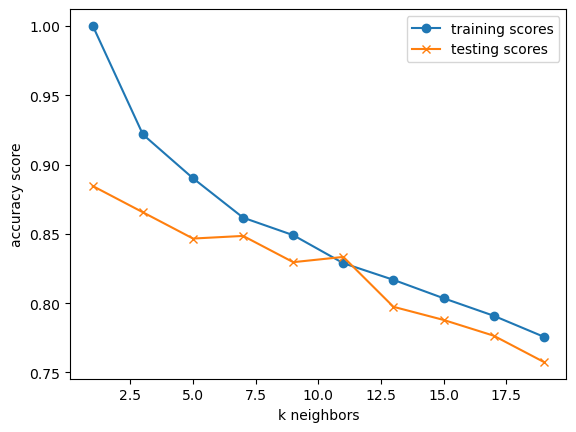

In [129]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [90]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)
rf_model.fit(X_train_df, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [98]:
rf_model.score(X_train_df, y_train)

1.0

In [100]:
rf_model.score(X_test_df, y_test)

0.9412878787878788

In [114]:
y_predict= rf_model.predict(X_test_df)
accuracyscore = accuracy_score(y_test, y_predict)

In [118]:
print(f"Accuracy Score : {accuracyscore}")

Accuracy Score : 0.9412878787878788


In [106]:
sorted(list(zip(rf_model.feature_importances_, X_train_df.columns)))

[(0.0020381539512260936, 'SMOKE'),
 (0.005772854030106414, 'SCC'),
 (0.0174558176086033, 'FAVC'),
 (0.0184999089361739, 'MTRANS'),
 (0.026735043340334434, 'CALC'),
 (0.028063024308537587, 'family_history_with_overweight'),
 (0.03310663079533866, 'CAEC'),
 (0.04311488681002149, 'CH2O'),
 (0.043247280461789585, 'FAF'),
 (0.043398628982937164, 'TUE'),
 (0.04901654736829659, 'NCP'),
 (0.06627433473981799, 'Gender'),
 (0.07908784278050676, 'FCVC'),
 (0.08667293922875474, 'Age'),
 (0.10216151781004447, 'Height'),
 (0.3553545888475107, 'Weight')]